# Решающие деревья (decision trees)

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

## Принцип работы и визуализация


In [ ]:
# классификация
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



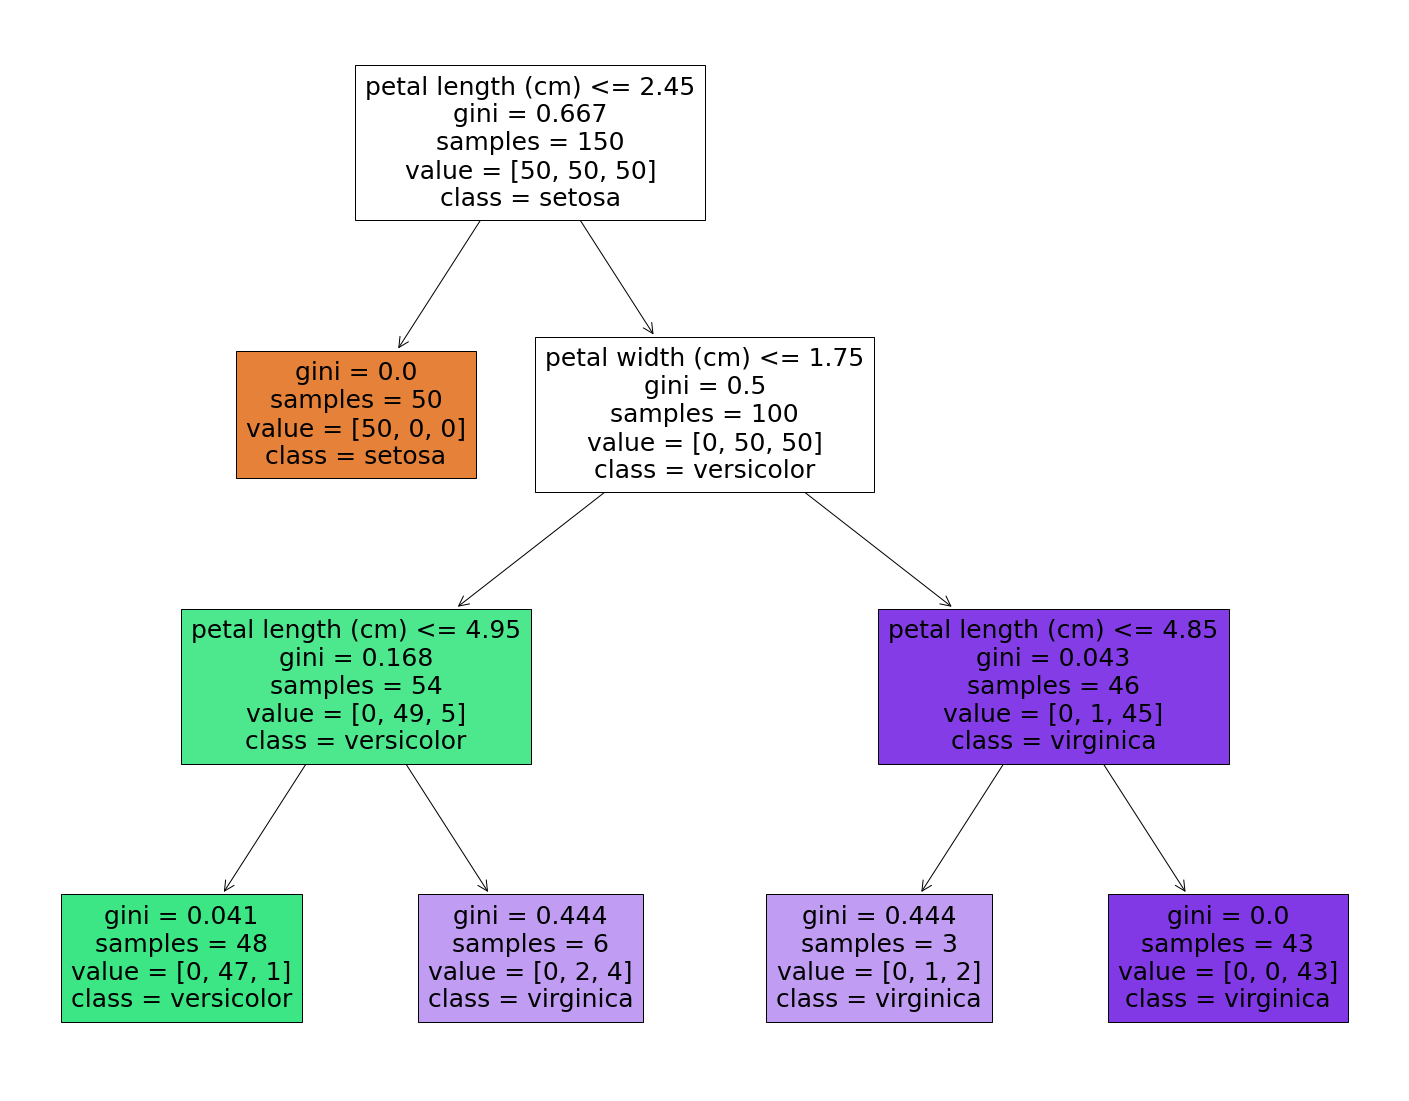

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [20]:
# регрессия

from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets


diab = datasets.load_diabetes()
X = diab.data
y = diab.target

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X, y)
diab

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_8 <= -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_6 <= 0.02
|   |   |   |--- value: [108.80]
|   |   |--- feature_6 >  0.02
|   |   |   |--- value: [83.37]
|   |--- feature_2 >  0.01
|   |   |--- feature_0 <= -0.08
|   |   |   |--- value: [274.00]
|   |   |--- feature_0 >  -0.08
|   |   |   |--- value: [154.67]
|--- feature_8 >  -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_2 <= -0.02
|   |   |   |--- value: [137.69]
|   |   |--- feature_2 >  -0.02
|   |   |   |--- value: [176.86]
|   |--- feature_2 >  0.01
|   |   |--- feature_2 <= 0.07
|   |   |   |--- value: [208.57]
|   |   |--- feature_2 >  0.07
|   |   |   |--- value: [268.87]



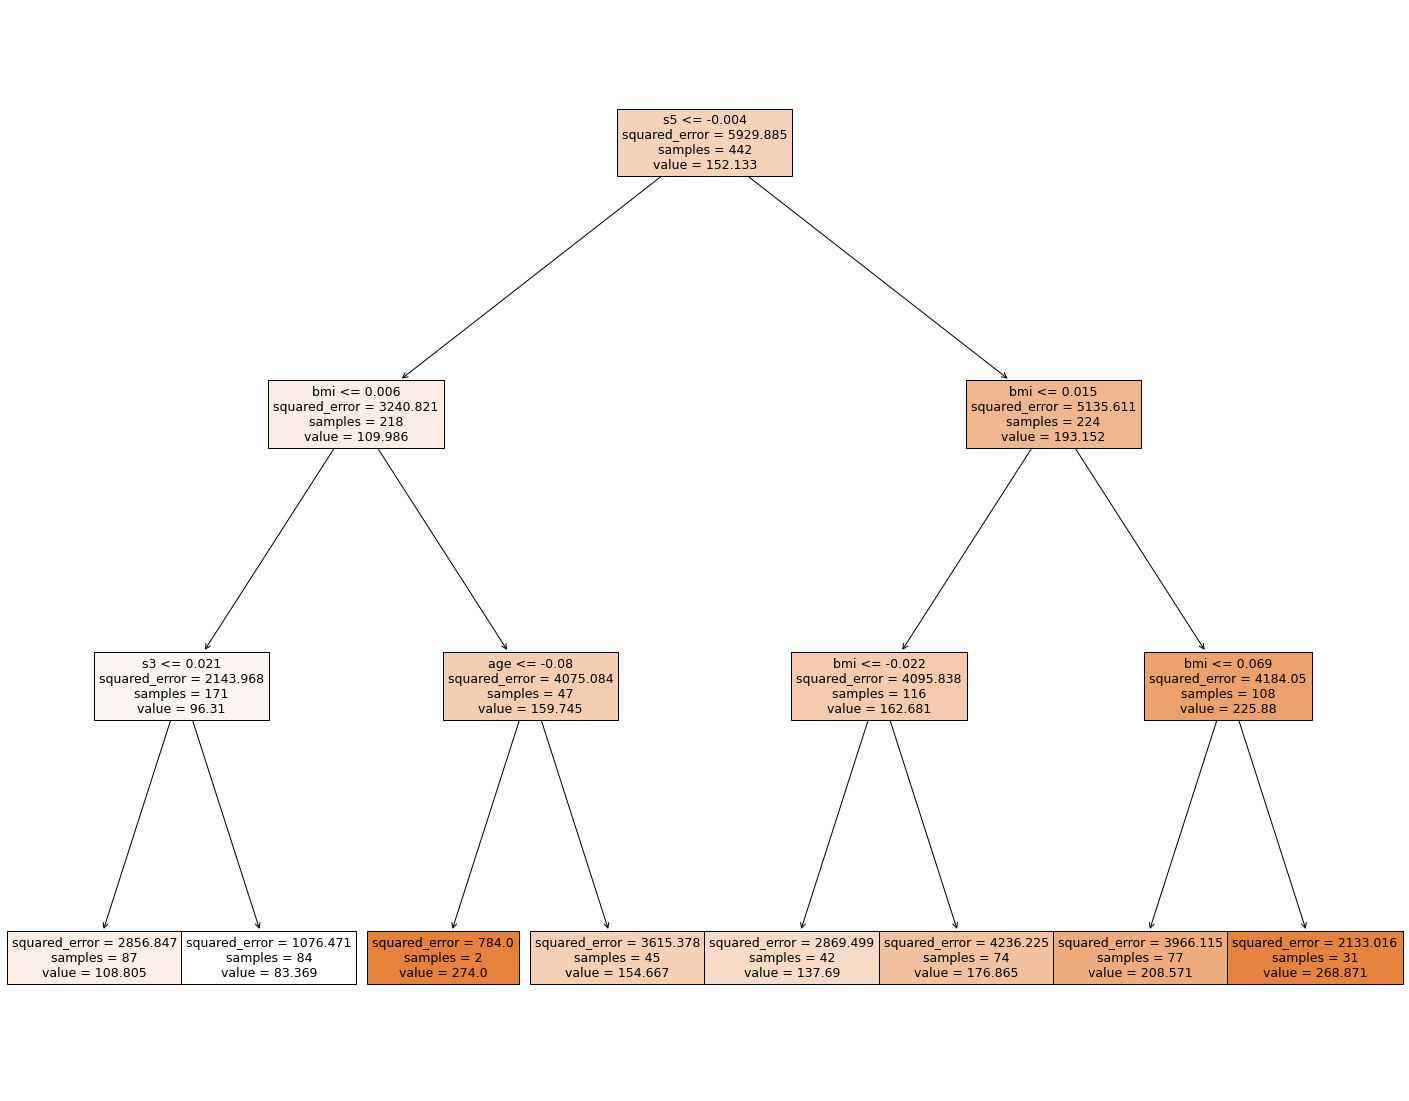

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=diab.feature_names, filled=True)

## Алгоритмы построения

**ID3** (Итеративный дихотомайзер 3) был разработан в 1986 году Россом Куинланом. 
Алгоритм создает дерево, находя для каждого узла (т. е. жадным способом) категориальный признак, который даст наибольший прирост информации. Деревья вырастают до максимального размера, а затем обычно применяется этап отсечения, чтобы улучшить способность дерева обобщать новые данные.

**C4.5** является преемником ID3 и убрал ограничение, согласно которому объекты должны быть категориальными, путем динамического определения дискретного атрибута (на основе числовых переменных), который разбивает непрерывное значение атрибута на дискретный набор интервалов. C4.5 преобразует обученные деревья (т. е. выходные данные алгоритма ID3) в наборы правил «если-то». Затем оценивается точность каждого правила, чтобы определить порядок их применения. Отсечение выполняется путем удаления предусловия правила, если точность правила улучшается без него.

**CART** (деревья классификации и регрессии) очень похож на C4.5, но отличается тем, что поддерживает числовые целевые переменные (регрессия) и не вычисляет наборы правил. CART строит бинарные деревья, используя признак и порог, которые дают наибольший прирост информации в каждом узле.

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya

Алгоритм CART
Строит бинарное дерево, где в узлах находится предикат, в листах находится ответ.
Задача -- минимизировать ошибку на каждом листе.

Алгоритм обучения упрощённо можно описать следующим образом:
0. Проверяем критерий остановки
1. Строим всевозможные разбиения на две подвыборки по одному признаку
2. Выбираем лучшее разбиение
3. Возвращаемся к шагу 0 для потомков
4. Проводим отсечение (pruning)

Описание алогритма: https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation

# Ансамбли
(метаалгоритмы, композиции алгоритмов)

- Бэггинг
 - Метод случайного леса (англ. random forest)
- Бустинг
 - Бустинг над решающими деревьями
- стекинг

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

## Бэггинг

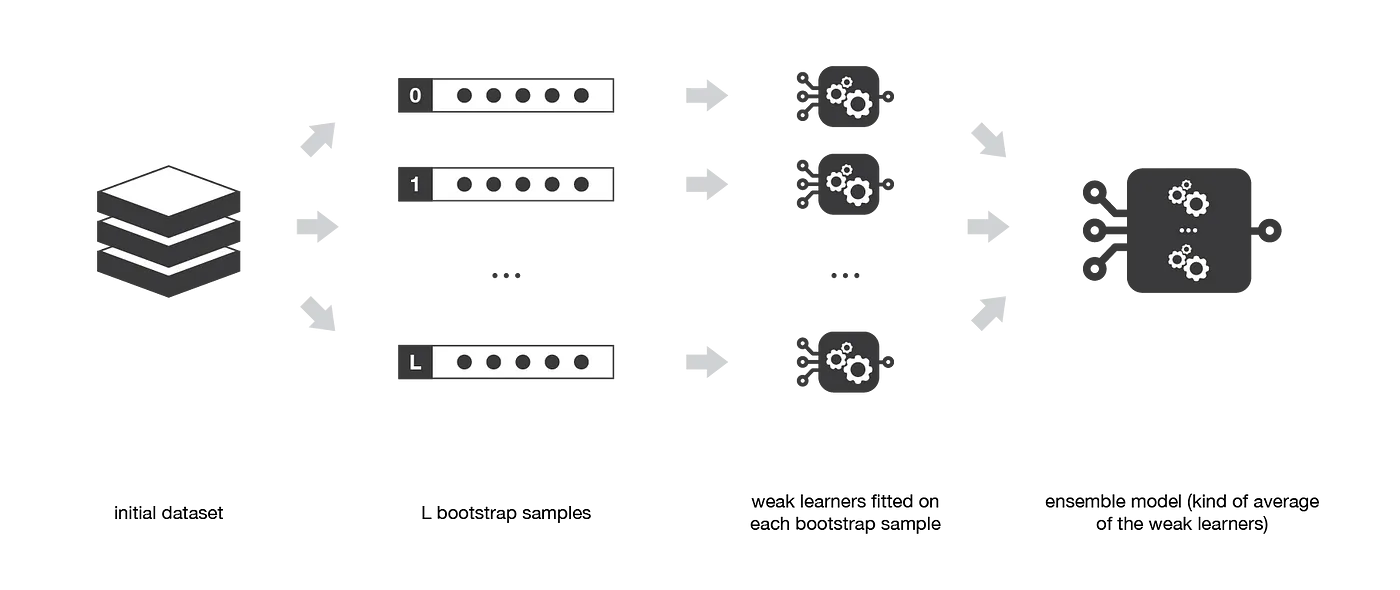

## Бустинг

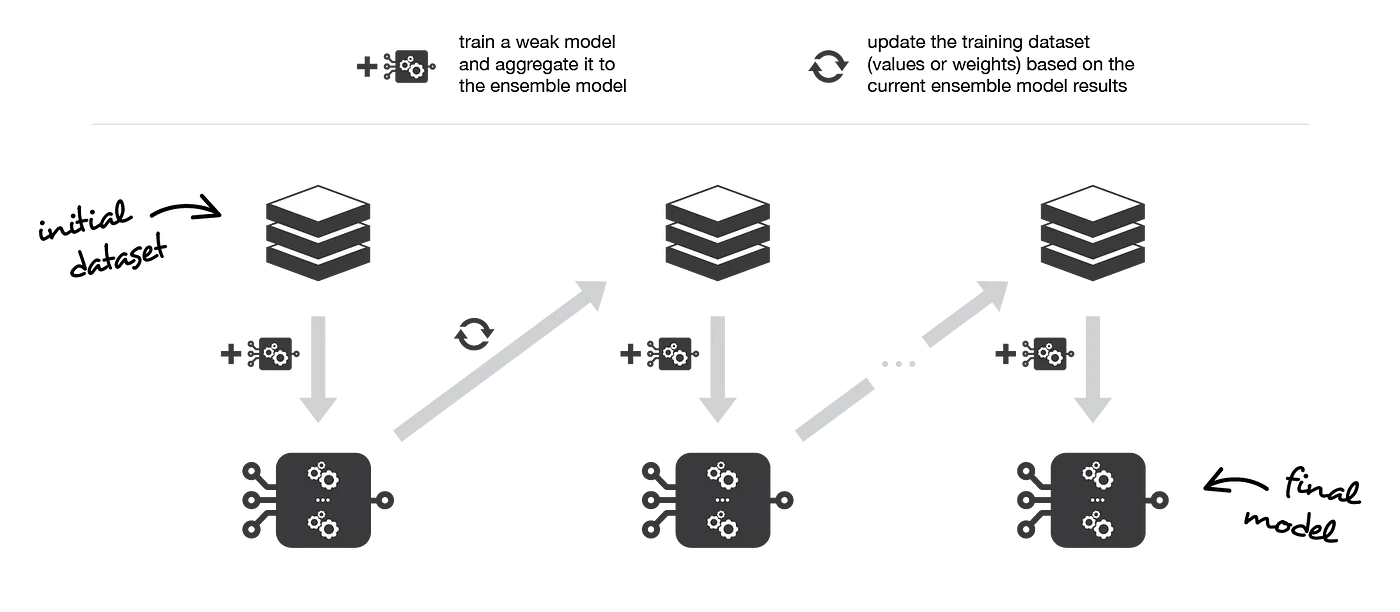

## Стекинг

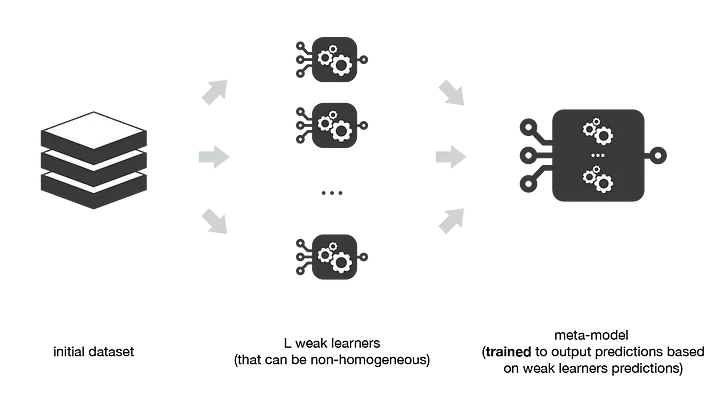

# Задание
  1. Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.
  2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor
  3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
    - [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
    - [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
    - [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)
  4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации.
  5. Доп. задание: реализовать(на выбор) бустинг или бэггинг.

Не забывайте про подготовку датасетов и подбор гиперпараметров.

Доп. ссылки:

* https://www.youtube.com/watch?v=kqJ03kWuvO0
* https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya
* https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii
* https://academy.yandex.ru/handbook/ml/article/gradientnyj-busting
* https://medium.com/@abedinia.aydin/survey-of-the-decision-trees-algorithms-cart-c4-5-id3-97df842831cd
* https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
* https://basegroup.ru/community/articles/math-cart-part1#comments

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor 
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [3]:
data_reg = pd.read_csv('../data/regression/moldova_cars_task.csv')
Xreg = data_reg.drop('Price(euro)', axis=1) # предикторы 
yreg = data_reg['Price(euro)']


Xreg['Model'] = Xreg['Model'].fillna(Xreg['Model'].mode()[0])
Xreg['Distance'] = Xreg['Distance'].fillna(Xreg['Distance'].mean())
Xreg['Year'] = Xreg['Year'].fillna(Xreg['Year'].mean())
Xreg['Transmission'] = Xreg['Transmission'].fillna(Xreg['Transmission'].mode()[0])
Xreg = pd.get_dummies(Xreg,columns=['Transmission','Fuel_type'])
Xreg = Xreg.drop('Style',axis=1)
Xreg = Xreg.drop('Model',axis=1)
d = Xreg['Make'].unique()
dict = {}
u = 1
for i in d:
    dict.update({i:u})
    u +=1
Xreg['Make'] = Xreg['Make'].map(dict)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(Xreg, yreg, test_size=0.3)

In [14]:
data_class = pd.read_csv('../data/classification/airlines_task.csv')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
data_class = data_class.drop('id',axis=1)
data_class  = data_class.drop('Flight',axis=1)
data_class['Airline'] = data_class['Airline'].fillna(data_class['Airline'].mode()[0])
data_class['AirportTo'] = data_class['AirportTo'].fillna(data_class['AirportTo'].mode()[0])
data_class['DayOfWeek'] = data_class['DayOfWeek'].fillna(data_class['DayOfWeek'].mean())
data_class['Length'] = data_class['Length'].fillna(data_class['Length'].mode()[0])

Xclass = data_class.drop('Delay', axis=1)
yclass = data_class['Delay'] 



bn = LabelEncoder()

Xclass['Airline'] = bn.fit_transform(Xclass['Airline'])
Xclass['AirportFrom'] =  bn.fit_transform(Xclass['Airline'])
Xclass['AirportTo'] = bn.fit_transform(Xclass['AirportTo'])

smote = SMOTE(random_state=1000)
Xclass, yclass = smote.fit_resample(Xclass, yclass)


scaler = MinMaxScaler()
scaler.fit(Xclass[["DayOfWeek","Time","Length"]])
Xclass[["DayOfWeek","Time","Length"]]= scaler.transform(Xclass[["DayOfWeek","Time","Length"]])

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(Xclass, yclass, test_size=0.33, random_state=42)






c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\malya\Deskt

MAE: 4098.772792011917
MSE: 8170256229.171971
RMSE: 90389.46968077627
MAPE: 0.5792285136081141
R^2: 0.007430610800442938


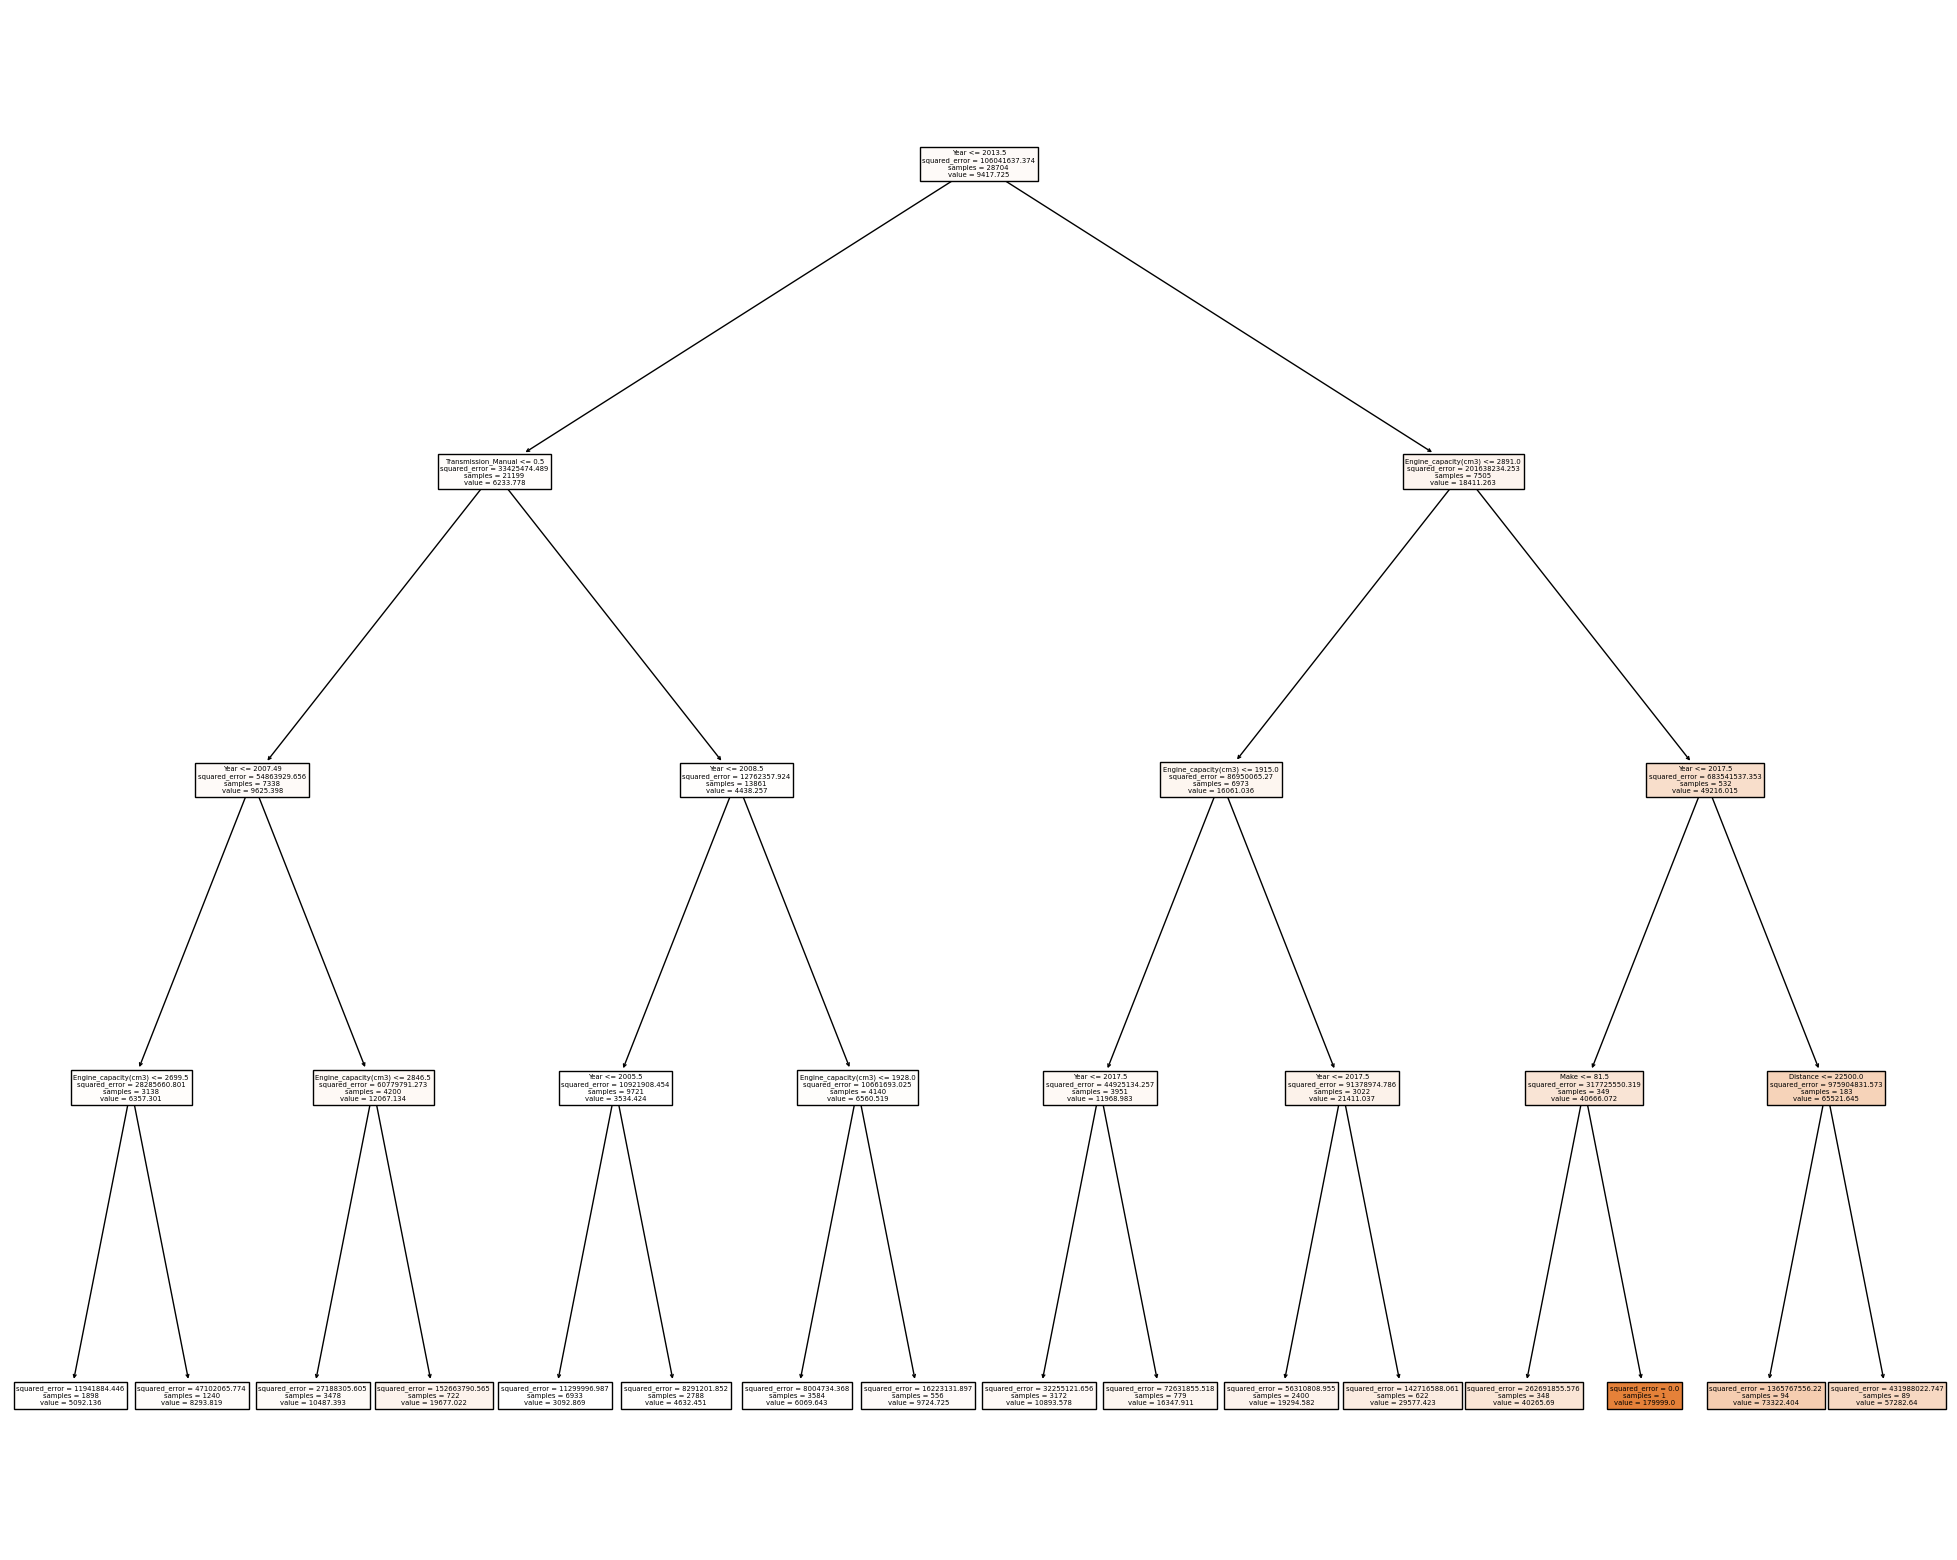

In [5]:
dict = {'max_depth':np.arange(0, 10)}
param = GridSearchCV(DecisionTreeRegressor(), dict, cv=5).fit(X_train_reg[:1000],y_train_reg[:1000]).best_params_
reg = DecisionTreeRegressor(max_depth=param['max_depth'])
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=X_test_reg.columns, filled=True)

print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {r2_score(y_test_reg, y_pred_reg)}')

c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\malya\Deskto

{'max_depth': 3}
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     98765
           1       0.60      0.20      0.30     33235

    accuracy                           0.77    132000
   macro avg       0.69      0.58      0.58    132000
weighted avg       0.74      0.77      0.72    132000



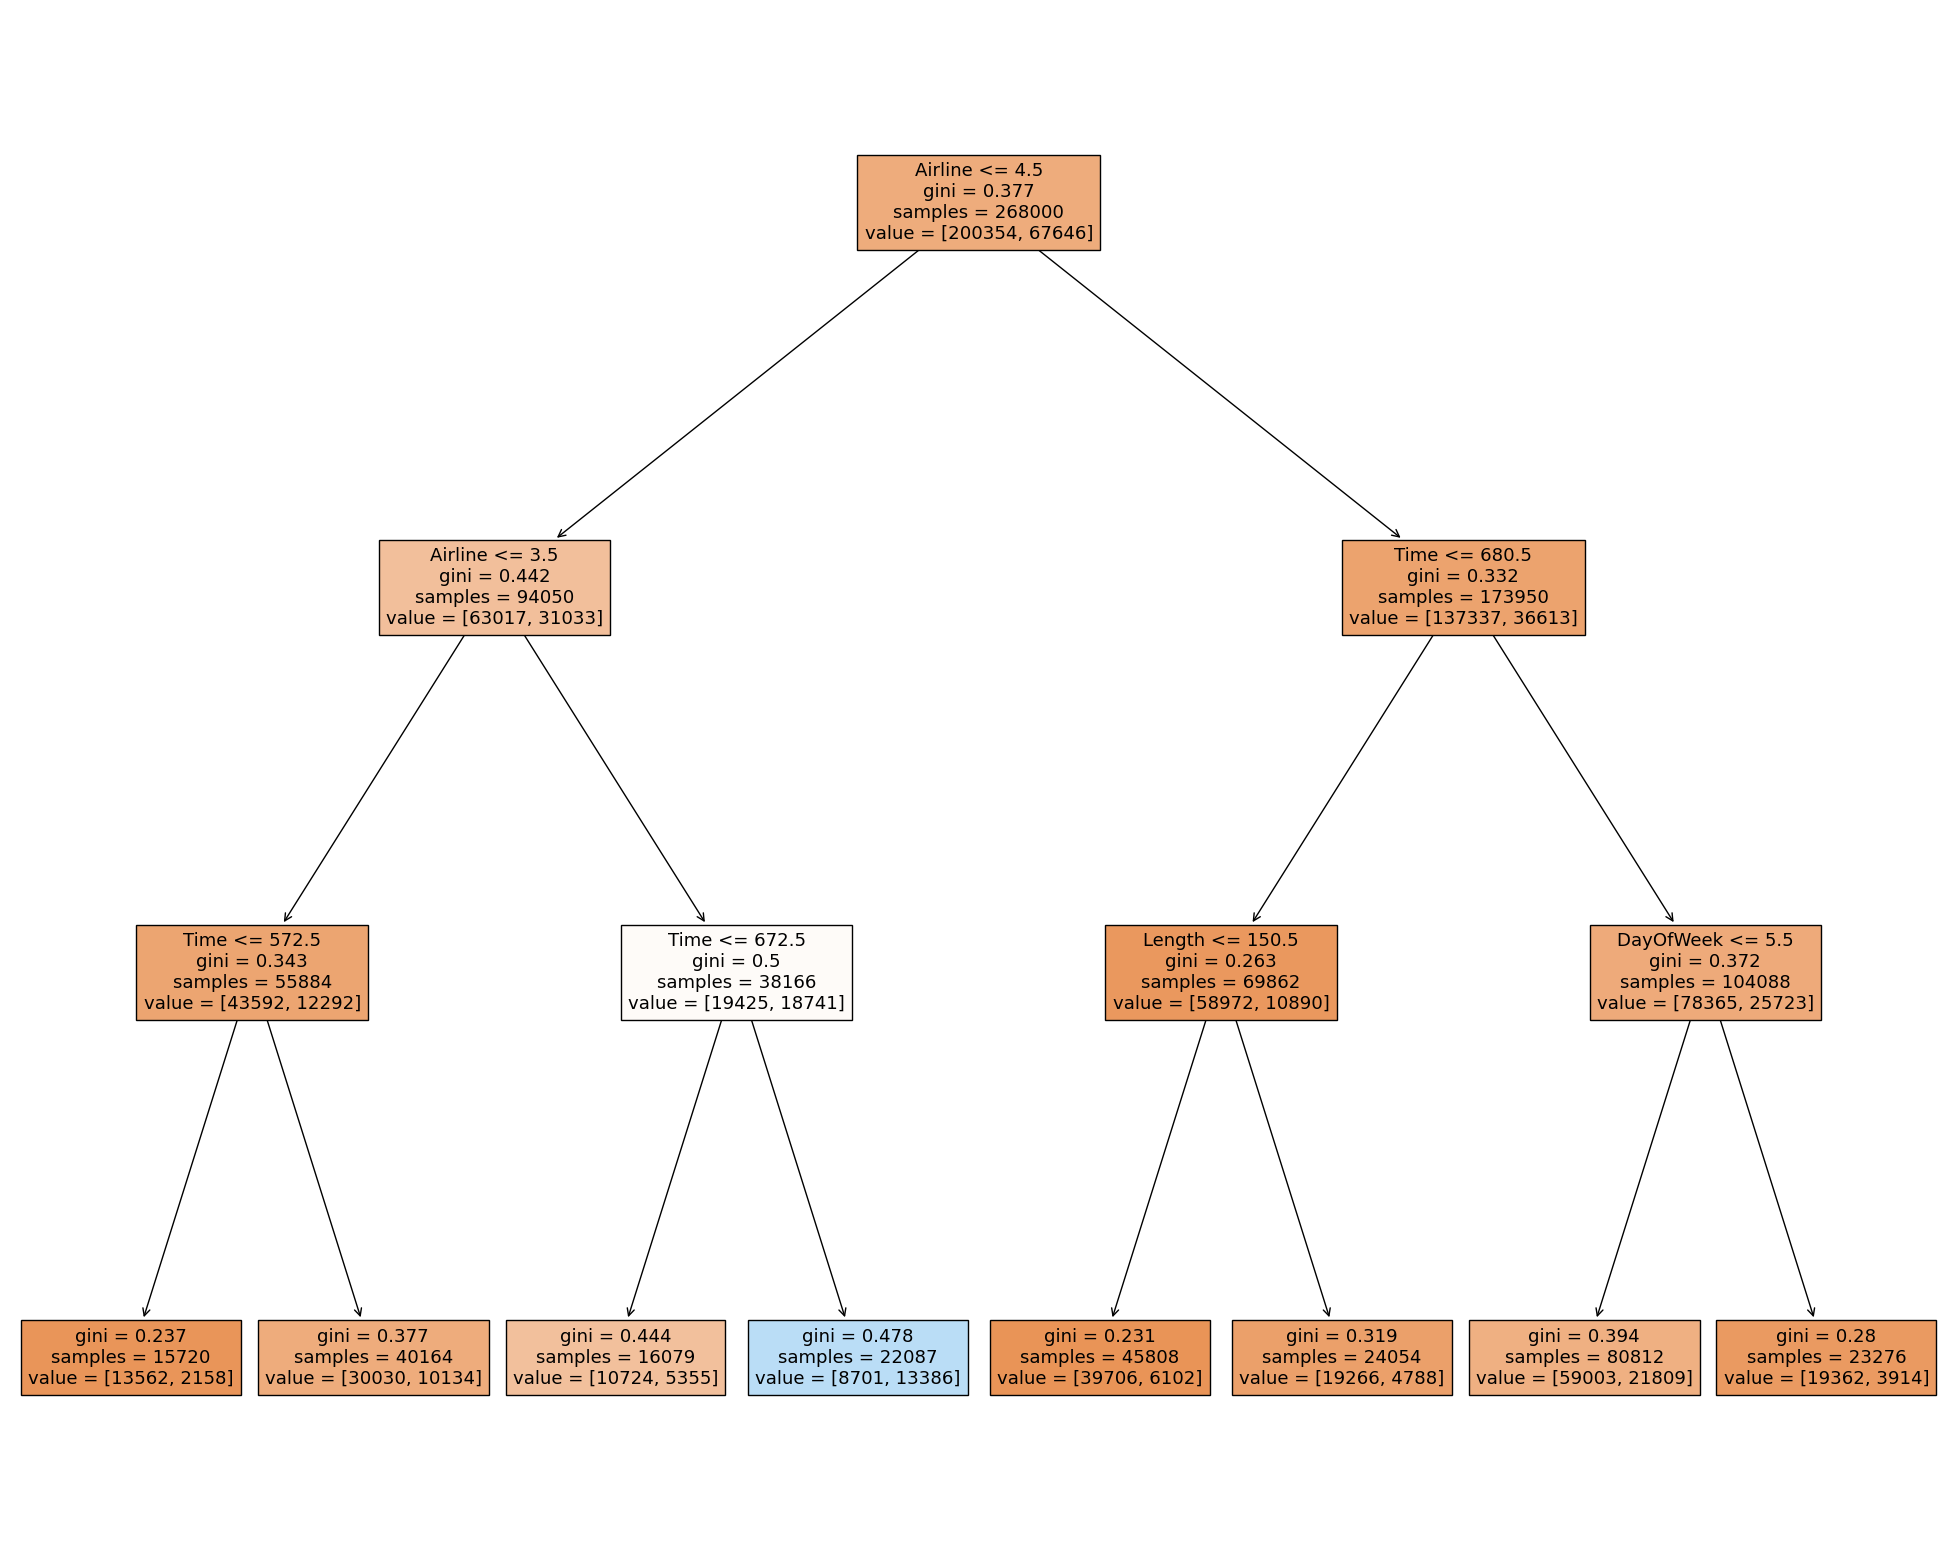

In [5]:

dict = {'max_depth':np.arange(0, 10)}
param = GridSearchCV(DecisionTreeClassifier(), dict, cv=5).fit(X_train_class[:1000],y_train_class[:1000]).best_params_
print(param)
classifier = DecisionTreeClassifier(max_depth=param['max_depth'])
classifier.fit(X_train_class,y_train_class)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,feature_names=X_test_class.columns, filled=True)

y_pred_class = classifier.predict(X_test_class)

print(classification_report(y_test_class, y_pred_class))

In [6]:

params = {'base_estimator': [None, LogisticRegression(), KNeighborsClassifier()],
          'n_estimators': [20,50,100]}

clf = GridSearchCV(BaggingClassifier(),param_grid =params, cv=5, verbose=1)
clf.fit(X_train_class[:1000], y_train_class[:1000])
y_pred_class = clf.predict(X_test_class[:1000])
print(classification_report(y_test_class[:1000], y_pred_class[:1000]))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       763
           1       0.50      0.01      0.02       237

    accuracy                           0.76      1000
   macro avg       0.63      0.50      0.44      1000
weighted avg       0.70      0.76      0.66      1000



In [7]:
params = {'n_estimators': [20,50,100],}

regr = GridSearchCV(BaggingRegressor(estimator=SVR(), n_estimators=10, random_state=0), param_grid =params, cv=3, n_jobs=-1, verbose=1).fit(X_train_reg[:1000], y_train_reg[:1000])

y_pred_reg = regr.predict(X_test_reg[:1000])

print(f'MAE: {mean_absolute_error(y_test_reg[:1000], y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg[:1000], y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg[:1000], y_pred_reg))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_reg[:1000], y_pred_reg))}')
print(f'R^2: {r2_score(y_test_reg[:1000], y_pred_reg)}')

Fitting 3 folds for each of 3 candidates, totalling 9 fits
MAE: 6004.259799121858
MSE: 110679204.71241009
RMSE: 10520.418466601512
MAPE: 1.08313356001671
R^2: -0.09142757140664459


In [8]:
clf = GridSearchCV(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0),param_grid =params).fit(X_train_class[:1000],y_train_class[:1000])

y_pred_class = y_pred_class = clf.predict(X_test_class[:1000])

print(classification_report(y_test_class[:1000], y_pred_class),clf.best_params_)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       763
           1       0.57      0.18      0.27       237

    accuracy                           0.77      1000
   macro avg       0.68      0.57      0.57      1000
weighted avg       0.74      0.77      0.72      1000
 {'n_estimators': 20}


In [9]:
regr = GridSearchCV(GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0),param_grid =params).fit(X_train_reg[:1000],y_train_reg[:1000])


y_pred_reg = regr.predict(X_test_reg[:1000])

print(f'MAE: {mean_absolute_error(y_test_reg[:1000], y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg[:1000], y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg[:1000], y_pred_reg))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_reg[:1000], y_pred_reg))}')
print(f'R^2: {r2_score(y_test_reg[:1000], y_pred_reg)}')
print(regr.best_params_)

MAE: 4124.358296775429
MSE: 51742478.219483964
RMSE: 7193.224466085009
MAPE: 0.7109195710552376
R^2: 0.4897581032643574
{'n_estimators': 20}


In [10]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', LinearSVC(random_state=42))
 ]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
params = {
    'final_estimator__C': [0.1, 1, 10],
    'stack_method': ['auto', 'predict_proba']
}
grid = GridSearchCV(clf, params, cv=5)
grid.fit(X_test_class[:1000],y_test_class[:1000])

y_pred_class = grid.predict(X_test_class[:1000])

print(classification_report(y_test_class[:1000], y_pred_class))

c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       763
           1       0.00      0.00      0.00       237

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.58      0.76      0.66      1000



c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\metrics\_classifi

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

estimators = [
    ('lr', LinearRegression()),
    ('lasso', Lasso(random_state=42)),
    ('ridge', Ridge(random_state=42))
]

# Создаем StackingRegressor
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Задаем параметры для поиска
params = {
    'lasso__alpha': [0.1, 1, 10],
    'ridge__alpha': [0.1, 1, 10],
    'final_estimator__fit_intercept': [True, False]
}

# Используем GridSearchCV для поиска лучших параметров
grid = GridSearchCV(reg, params, cv=5)
grid.fit(X_train_reg[:1000],y_train_reg[:1000])

y_pred_reg = regr.predict(X_test_reg[:1000])

print(f'MAE: {mean_absolute_error(y_test_reg[:1000], y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg[:1000], y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg[:1000], y_pred_reg))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_reg[:1000], y_pred_reg))}')
print(f'R^2: {r2_score(y_test_reg[:1000], y_pred_reg)}')

c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+11, tolerance: 2.938e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.84424e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.128e+07, tolerance: 2.833e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\malya\Desktop\маш об

MAE: 4124.358296775429
MSE: 51742478.219483964
RMSE: 7193.224466085009
MAPE: 0.7109195710552376
R^2: 0.4897581032643574


In [16]:
from catboost import CatBoostClassifier
import pickle 

model = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
model.fit(X_train_class, y_train_class)
y_preds_class = model.predict(X_test_class)
knnPickle = open('class_model_cat', 'wb') 
      
# source, destination 
pickle.dump(model, knnPickle)  

# close the file
knnPickle.close()
print(classification_report(y_test_class, y_preds_class))

0:	learn: 0.6495754	total: 21.3ms	remaining: 21.3ms
1:	learn: 0.6253417	total: 44.4ms	remaining: 0us
              precision    recall  f1-score   support

           0       0.71      0.51      0.59     98707
           1       0.62      0.79      0.69     98712

    accuracy                           0.65    197419
   macro avg       0.66      0.65      0.64    197419
weighted avg       0.66      0.65      0.64    197419



In [6]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=2,
                          learning_rate=0.6,
                          depth=1)

model.fit(X_train_reg, y_train_reg)
y_pred_reg = model.predict(X_test_reg)

print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {r2_score(y_test_reg, y_pred_reg)}')

NameError: name 'X_train_reg' is not defined

In [15]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parent))

from src.DecisinTrees.card import CART

model = CART(max_depth=3, model ="Regresion")
model.fit(np.array(X_train_reg), np.array(y_train_reg))

y_pred = model.predict(np.array(X_test_reg))
mse = mean_squared_error(y_test_reg, y_pred)
print("MSE:", mse)


model = CART(max_depth=3, model ="Classification")
model.fit(np.array(X_train_class), np.array(y_train_class))

y_pred_class = model.predict(np.array(X_test_class))

print(classification_report(y_test_class, y_pred_class))


MSE: 102827974.38602756
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     98765
           1       0.60      0.20      0.30     33235

    accuracy                           0.77    132000
   macro avg       0.69      0.58      0.58    132000
weighted avg       0.74      0.77      0.72    132000



In [6]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parent))

from src.DecisinTrees.card import CART

model = CART(max_depth=3, model ="Regresion")
model.fit(np.array(X_train_reg), np.array(y_train_reg))

y_pred = model.predict(np.array(X_test_reg))

print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {r2_score(y_test_reg, y_pred_reg)}')


model = CART(max_depth=3, model ="Classification")
model.fit(np.array(X_train_class), np.array(y_train_class))

y_pred_class = model.predict(np.array(X_test_class))

print(classification_report(y_test_class, y_pred_class))


MAE: 4098.772792011917
MSE: 8170256229.171971
RMSE: 90389.46968077627
MAPE: 0.5792285136081141
R^2: 0.007430610800442938
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     98765
           1       0.60      0.20      0.30     33235

    accuracy                           0.77    132000
   macro avg       0.69      0.58      0.58    132000
weighted avg       0.74      0.77      0.72    132000



In [9]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parent))

from src.DecisinTrees.bagging import Bagging

model = Bagging(model ="Regresion")
model.fit(np.array(X_train_reg), np.array(y_train_reg))

y_pred = model.predict(np.array(X_test_reg))

print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {r2_score(y_test_reg, y_pred_reg)}')


model =  Bagging(model ="Classification")
model.fit(np.array(X_train_class), np.array(y_train_class))

y_pred_class = model.predict(np.array(X_test_class))

print(classification_report(y_test_class, y_pred_class))


MAE: 4098.772792011917
MSE: 8170256229.171971
RMSE: 90389.46968077627
MAPE: 0.5792285136081141
R^2: 0.007430610800442938
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     98765
           1       0.00      0.00      0.00     33235

    accuracy                           0.75    132000
   macro avg       0.37      0.50      0.43    132000
weighted avg       0.56      0.75      0.64    132000



c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
